In [1]:
import os 
import glob
from pathlib import Path
import pandas as pd 
import numpy as np 

In [2]:
gbm_patients = os.listdir('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti')

In [3]:
lgg_patients = os.listdir('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti')

## We need to map the segmentations that are seemingly randomly named from one of the T1, T2, T2-FLAIR or T1C nifti images that were fed to the algorithm

In [4]:
series_folders_with_segs = os.listdir('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip')

In [5]:
# patient = gbm_patients[0]

In [6]:
root_dir = "/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti"

In [7]:
# [x.split('/')[-1] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [8]:
gbm_patientID_to_seriesID = {}
for patient in gbm_patients: 
    gbm_patientID_to_seriesID[patient] = [x.split('/')[-1].split('.')[0:-2][0] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [9]:
root_dir = "/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti"

In [10]:
lgg_patientID_to_seriesID = {}
for patient in lgg_patients: 
    lgg_patientID_to_seriesID[patient] = [x.split('/')[-1].split('.')[0:-2][0] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [11]:
gbm_patientID_to_seriesID

{'TCGA-06-0210': ['1-SAG_LOCAL-29333',
  '3-AXIAL_T1-88865',
  '2-AXIAL_T2-83081',
  '4-AXIAL_T1_POST_GD-64939'],
 'TCGA-08-0350': ['15-3DFSE_AXIAL-04462',
  '1-TI_SAG_MR_BRAIN_WHOLE_HEAD-52088',
  '5-3DFSE_AXIAL-96333',
  '3-FMPSPGR_SAG-00857',
  '6-FLAIR_AXIAL-64078',
  '4-3DSPGR_AXIAL-74692',
  '14-3DSPGR_AXIAL-02601',
  '2-FSE_AX_MR_BRAIN-11136'],
 'TCGA-14-0865': ['401-BRAIN_WWO_T2_AX_GRASE-74294a_n',
  '101-BRAIN_WWO_mst_scout-71529',
  '701-BRAIN_WWO_T1_COR_POST-08207',
  '301-BRAIN_WWO_T1_AX_PRE-13193',
  '601-BRAIN_WWO_T1_AX_POST-95894',
  '401-BRAIN_WWO_T2_AX_GRASE-74294a_n_skull',
  '301-BRAIN_WWO_T1_AX_PRE-13193a_n_skull',
  '701-BRAIN_WWO_T1_COR_POST-08207a_n_mask',
  '201-BRAIN_WWO_T1_SAG_23SL-32502',
  '501-BRAIN_WWO_FLAIR_AX-67274a_n',
  '301-BRAIN_WWO_T1_AX_PRE-13193a',
  '501-BRAIN_WWO_FLAIR_AX-67274a',
  '601-BRAIN_WWO_T1_AX_POST-95894a_n_skull',
  '701-BRAIN_WWO_T1_COR_POST-08207a',
  '401-BRAIN_WWO_T2_AX_GRASE-74294a',
  '501-BRAIN_WWO_FLAIR_AX-67274',
  '501-BRAIN

In [12]:
mapping_dict = {}

In [13]:
for idx, i in enumerate(series_folders_with_segs): 
    for key, value in gbm_patientID_to_seriesID.items(): 
        if i in value: 
#             print(idx, i, key)
            mapping_dict[i] = key

In [14]:
for idx, i in enumerate(series_folders_with_segs): 
    for key, value in lgg_patientID_to_seriesID.items(): 
        if i in value: 
#             print(idx, i, key)
            mapping_dict[i] = key

In [15]:
mapping_dict

{'10-AXIAL_T1_GD-80908a': 'TCGA-06-0132',
 '901-BRAIN_WOW_AX_T1_POST-86504a': 'TCGA-14-0812',
 '10-AXIAL_T1_C-24985a': 'TCGA-02-0070',
 '9-AX_T1_POST_GD_FLAIR-08425a': 'TCGA-06-0149',
 '8-AXIAL_T1_GD-58362a': 'TCGA-06-0188',
 '14-Ax_SE_T1_Post-47437a': 'TCGA-02-0059',
 '901-BRAIN______T1_AX_POST-47275a': 'TCGA-14-0817',
 '9-T1_AXIAL_Gd-31768a': 'TCGA-19-5960',
 '10-3d_T1_FSPGR__CONT-32567a': 'TCGA-08-0389',
 '12-AX_T1_POST_GD_FLAIR-61610a': 'TCGA-06-1802',
 '8-AXIAL_T1_GD-27646a': 'TCGA-06-0137',
 '10-AX_T1_POST_GD_FLAIR-07635a': 'TCGA-06-0192',
 '15-Ax_SE_T1_Post-42502a': 'TCGA-02-0087',
 '10-T1_AXIAL__POST-97398a': 'TCGA-12-1098',
 '7-MRHG_T1_AX_POST_GAD-84768a': 'TCGA-19-0963',
 '8-T1_AX_POST_GAD-12257a': 'TCGA-08-0358',
 '801-T1_AX_POST-02525a': 'TCGA-14-1795',
 '6-AX_T1_POST-26504a': 'TCGA-02-0006',
 '11-AX_T1_POST-86265a': 'TCGA-02-0086',
 '6-AX_T1_POST-94928a': 'TCGA-02-0102',
 '4-3D_SPGR_AX-58233a': 'TCGA-08-0524',
 '7-MRHG_T1_AX_POST_GAD-07452a': 'TCGA-19-1388',
 '11-AxT1-thin

In [16]:
len(mapping_dict.keys())

202

## Now just quickly visually spot checking a few of the segmentations to see if they are correct: 

In [17]:
## Let's investigate just a few of them to ensure that they are correct: 
import nibabel as nib
import matplotlib.pyplot as plt

/data/svcf/software/anaconda3/envs/fastai/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


### TCGA-DU-A5TS

Chosen b/c has an odd (potentially problematic) naming issue: 

In [18]:
fla_DU_A5TS = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti/TCGA-DU-A5TS/07-26-1997-MRI_BRAIN_WWO_CONTRAST-00379/4-Ax_FLAIR_2.5mm_for_surgery-75341a_n.nii.gz')

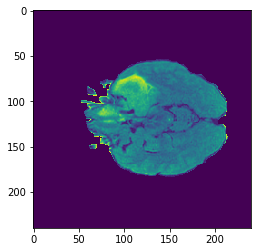

In [19]:
plt.imshow(fla_DU_A5TS.dataobj[:,:,60])

In [20]:
seg_WT_DU_A5TS = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/11-Ax_T1_2/11-Ax_T1_2_WT.nii.gz')

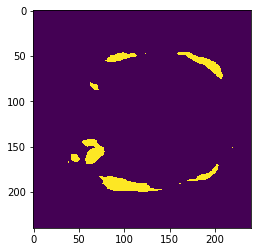

In [21]:
plt.imshow(seg_WT_DU_A5TS.dataobj[:,:,60])

In [22]:
seg_ET_DU_A5TS = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/11-Ax_T1_2/11-Ax_T1_2_ET.nii.gz')

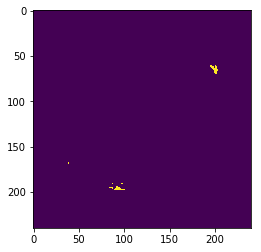

In [23]:
plt.imshow(seg_ET_DU_A5TS.dataobj[:,:,60])

### TCGA-76-6664

Chosen Randomly, maps to `1401-T1_SAG_POST-07378a`


In [24]:
import json

In [30]:
## Read in datalist json

with open('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/config/config_datalist_stripped.json') as json_file:
    datalist = json.load(json_file)
    

In [31]:
datalist

{'validation': [{'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/11-AX_T1_POST_GD_FLAIR-81300a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/8-AX_T1_pre_gd-14019a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/7-AX_T2_FR-FSE_RF2_150-55295a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/6-AXIAL_FLAIR-84159a_n.nii.gz']},
  {'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/1001-T1_SE_POST-94212a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/301-T1_SAG_SE-41348a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/501-T2-WHOLE_BRAIN-32557a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/401-T2_AX_FLAIR-72445a_n.nii.gz']},
  {'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-FG-A6J1/04-23-2004-NR_MRI_BRAIN_WWO-08141/

In [34]:
t1ca_76_6664 = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-76-6664//01-10-2002-MRI_BRAIN_per_R-81790/1401-T1_SAG_POST-07378a_n.nii.gz')

In [44]:
fla_76_6664 = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-76-6664/01-10-2002-MRI_BRAIN_per_R-81790/601-T2_AX_FLAIR-75280a_n.nii.gz')

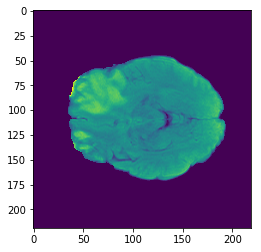

In [46]:
plt.imshow(fla_76_6664.dataobj[:,:,70])

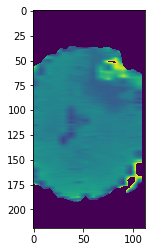

In [49]:
plt.imshow(t1ca_76_6664.dataobj[:,,:])

In [51]:
## read in the segmentation of the whole tumor of this one: 
seg_WT_76_6664 = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/1401-T1_SAG_POST-07378a/1401-T1_SAG_POST-07378a_WT.nii.gz')

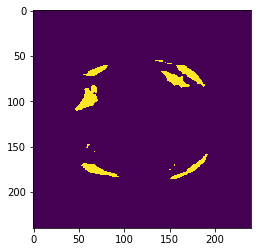

In [54]:
plt.imshow(seg_WT_76_6664.dataobj[:,:,60])

## Ok so this is attempt #1, that clearly didn't work, going to have to go back + skull strip + run inference again.... 